<a href="https://colab.research.google.com/github/puneat/COVID-19_Estimation/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import numpy as np 
import pandas as pd
import os
from numpy import log
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from datetime import date

In [ ]:
#import pmdarima as pm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline 
import matplotlib
import seaborn as sns

In [ ]:
rawdata1=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
rawdata2=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
rawdata3=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
rawdata4=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
rawdata5=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
rawdata6=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')

In [ ]:
print(rawdata1.shape,'\n',rawdata2.shape,'\n',rawdata3.shape,
'\n',rawdata4.shape,'\n',rawdata5.shape,'\n',rawdata6.shape)

(17364, 21) 
 (10819, 21) 
 (10020, 20) 
 (18220, 20) 
 (20438, 20) 
 (16594, 20)


In [ ]:
rawdata1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num cases'],
      dtype='object')

In [ ]:
rawdata2.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num cases'],
      dtype='object')

In [ ]:
rawdata3.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [ ]:
rawdata4.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [ ]:
rawdata5.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [ ]:
rawdata6.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [ ]:
frames=[rawdata1,rawdata2];
cons_12=pd.concat(frames);
cons_12=cons_12.reset_index()

In [ ]:
frames=[rawdata3,rawdata4,rawdata5,rawdata6];
cons_3456=pd.concat(frames);
cons_3456=cons_3456.reset_index()

In [ ]:
cons_12.head(2)

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1


In [ ]:
cons_3456.tail(2)

,index,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Contracted from which Patient (Suspected),Notes,Source_1,Source_2,Source_3,Nationality,Type of transmission,Status Change Date,Patient Number
64273,15595,64226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93596.0
64274,15596,64227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93597.0


In [ ]:
cons_3456=cons_3456.drop(columns=['Source_1','Source_2','Source_3','Type of transmission',
             'Nationality','Contracted from which Patient (Suspected)',
             'Notes','Detected District','Detected State','State code',
             'Detected City','State Patient Number','Entry_ID','Status Change Date','index']);
cons_3456.head(2)

,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number
0,27/04/2020,NaN,NaN,38.0,Hospitalized,27892.0
1,27/04/2020,NaN,NaN,2.0,Hospitalized,27893.0


In [ ]:
cons_3456=cons_3456.drop(columns=['index'])

In [ ]:
cons_3456=cons_3456.drop(columns=['Source_1','Source_2','Source_3','Type of transmission',
          'Nationality','Contracted from which Patient (Suspected)',
          'Notes','Detected District','Detected State','State code',
          'Detected City','State Patient Number','Entry_ID','Status Change Date','index']);
cons_3456.head(2)

,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number
0,27/04/2020,NaN,NaN,38.0,Hospitalized,27892.0
1,27/04/2020,NaN,NaN,2.0,Hospitalized,27893.0


In [ ]:
cons_12=cons_12.drop(columns=['Source_1','Source_2','Source_3','Backup Notes','Type of transmission',
             'Nationality','Contracted from which Patient (Suspected)',
             'Notes','Detected District','Detected State','State code',
             'Detected City','Estimated Onset Date','State Patient Number','Status Change Date']);
cons_12.tail(2)

,index,Patient Number,Date Announced,Age Bracket,Gender,Current Status,Num cases
28181,10817,NaN,25/04/2020,NaN,NaN,Hospitalized,6
28182,10818,NaN,25/04/2020,NaN,NaN,Hospitalized,-6


In [ ]:


cons_12=cons_12.drop(columns=['index'])

In [ ]:
cons_12=cons_12.drop(columns=['Source_1','Source_2','Source_3','Backup Notes',
  'Type of transmission','Nationality','Contracted from which Patient (Suspected)',
  'Notes','Detected District','Detected State','State code',
  'Detected City','Estimated Onset Date','State Patient Number','Status Change Date']);
cons_12=cons_12.drop(columns=['index'])
cons_12.head(2)

,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number
0,30/01/2020,20,F,1,Recovered,1.0
1,02/02/2020,NaN,NaN,1,Recovered,2.0


In [ ]:
cons_12=cons_12[['Date Announced', 'Age Bracket', 'Gender', 'Num cases','Current Status',
       'Patient Number']]
cons_12.columns=cons_3456.columns

In [ ]:
cons_3456.tail(2)

,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number
65270,15/06/2020,NaN,NaN,NaN,NaN,94596.0
65271,15/06/2020,NaN,NaN,NaN,NaN,94597.0


In [ ]:
df.to_csv('/gdrive/My Drive/ml/consdata.csv')

In [ ]:
frames=[cons_12,cons_3456];
df=pd.concat(frames);
df=df.reset_index()

In [ ]:
df.any().isnull

<bound method Series.isnull of Date Announced    True
Age Bracket       True
Gender            True
Num Cases         True
Current Status    True
Patient Number    True
dtype: bool>

In [ ]:
df['Age Bracket'] = pd.to_numeric(df['Age Bracket'].
                  astype(str).str.replace(',',''), 
                  errors='coerce').fillna(0).astype(int)

In [ ]:
df=df.drop(columns='index');
df.head(60)


,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number
0,30/01/2020,20,F,1.0,Recovered,1.0
1,02/02/2020,0,NaN,1.0,Recovered,2.0
2,03/02/2020,0,NaN,1.0,Recovered,3.0
3,02/03/2020,45,M,1.0,Recovered,4.0
4,02/03/2020,24,M,1.0,Recovered,5.0
5,03/03/2020,69,M,1.0,Recovered,6.0
6,04/03/2020,55,NaN,1.0,Recovered,7.0
7,04/03/2020,55,NaN,1.0,Recovered,8.0
8,04/03/2020,55,NaN,1.0,Recovered,9.0
9,04/03/2020,55,NaN,1.0,Recovered,10.0


In [ ]:
df['Date Announced']=pd.to_datetime(df['Date Announced'])
df['Date Announced'] = df['Date Announced'].dt.strftime('%d/%m/%Y')

In [ ]:
df['Date Announced']=pd.to_datetime(df['Date Announced'])
df['Date Announced'] = df['Date Announced'].dt.strftime('%d/%m/%Y')
df.head(5)

,index,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number
0,0,30/01/2020,20,F,1.0,Recovered,1.0
1,1,02/02/2020,NaN,NaN,1.0,Recovered,2.0
2,2,03/02/2020,NaN,NaN,1.0,Recovered,3.0
3,3,02/03/2020,45,M,1.0,Recovered,4.0
4,4,02/03/2020,24,M,1.0,Recovered,5.0
5,5,03/03/2020,69,M,1.0,Recovered,6.0
6,6,04/03/2020,55,NaN,1.0,Recovered,7.0
7,7,04/03/2020,55,NaN,1.0,Recovered,8.0
8,8,04/03/2020,55,NaN,1.0,Recovered,9.0
9,9,04/03/2020,55,NaN,1.0,Recovered,10.0


In [ ]:
df.tail(10)

,Date Announced,Age Bracket,Gender,Num Cases,Current Status,Patient Number,Infected,Recovered,Death,Total Infected,Total Recovered,Total Deaths
92388,2020-06-14,0,NaN,15.0,Recovered,93528.0,0,0,0,2.0,1.0,1.0
92389,2020-06-14,0,NaN,13.0,Recovered,93529.0,0,0,0,2.0,1.0,1.0
92390,2020-06-14,0,NaN,11.0,Recovered,93530.0,0,0,0,2.0,1.0,1.0
92391,2020-06-14,0,NaN,4.0,Recovered,93531.0,0,0,0,2.0,1.0,1.0
92392,2020-06-14,0,NaN,8.0,Recovered,93532.0,0,0,0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92453,NaT,0,NaN,NaN,NaN,93593.0,0,0,0,2.0,1.0,1.0
92454,NaT,0,NaN,NaN,NaN,93594.0,0,0,0,2.0,1.0,1.0
92455,NaT,0,NaN,NaN,NaN,93595.0,0,0,0,2.0,1.0,1.0
92456,NaT,0,NaN,NaN,NaN,93596.0,0,0,0,2.0,1.0,1.0


In [ ]:
count=0;
df["Infected"]=0;
df["Recovered"]=0;
df["Death"]=0;
value=0
for item in df['Age Bracket']:
  if ((item>=35)  and (item<=50)):
    if(df['Current Status'][count]=='Hospitalized'):
      df['Infected'][count]=1;
      
    if(df['Current Status'][count]=='Recovered'):
      df['Recovered'][count]=1;
  
    if(df['Current Status'][count]=='Deceased'):
      df['Death'][count]=1;

  count=count+1

In [ ]:
df["Total Infected"]=0;
df["Total Recovered"]=0;
df["Total Deaths"]=0;
count=0;
for item in df['Current Status']:
  if(item=='Hospitalized'):
    df["Total Infected"][count]=df['Num Cases'][count];

  if(item=='Recovered'):
    df["Total Recovered"][count]=df["Num Cases"][count];

  if(item=='Deceased'):
    df["Total Deaths"][count]=df["Num Cases"][count];
  
  count=count+1;

In [ ]:
final.drop(final.tail(1).index,inplace=True) # drop last n rows

In [ ]:
df['Date Announced']=pd.to_datetime(df['Date Announced'])
final = df.groupby('Date Announced')["Date Announced","Infected","Recovered",
"Death","Total Infected","Total Recovered","Total Deaths"].sum()
final.reset_index()
final.tail(10)

,Infected,Recovered,Death,Total Infected,Total Recovered,Total Deaths
Date Announced,,,,,,
2020-06-06,197,0,2,10408,5433.0,297
2020-06-07,110,0,3,10882,5191.0,261
2020-06-08,133,0,2,8536,5171.0,271
2020-06-09,101,0,0,9981,5634.0,272
2020-06-10,105,0,1,11156,6275.0,358
2020-06-11,126,2,8,11135,6044.0,394
2020-06-12,104,1,2,11306,7263.0,388
2020-06-13,119,0,0,12039,8092.0,309
2020-06-14,104,0,2,11378,7356.0,321


In [ ]:
final['Infected Increase']=0
final['Death Increase']=0
final['Recovered Increase']=0
final['Infected Increase'][0]=0
final['Death Increase'][0]=0
final['Recovered Increase'][0]=0
for i in range(1,final.shape[0]):
    final['Infected Increase'][i]=+(final['Infected Increase'][i-1]+final.iloc[i][0])
    final['Death Increase'][i]=+(final['Death Increase'][i-1]+final.iloc[i][2])
    final['Recovered Increase'][i]=+(final['Recovered Increase'][i-1]+final.iloc[i][1])
final.tail(5)

,Infected,Recovered,Death,Total Infected,Total Recovered,Total Deaths,Infected Increase,Death Increase,Recovered Increase
Date Announced,,,,,,,,,
2020-06-10,105,0,1,286926,134623.0,7272,10052,91,39
2020-06-11,126,2,8,298061,140667.0,7666,10178,99,41
2020-06-12,104,1,2,309367,147930.0,8054,10282,101,42
2020-06-13,119,0,0,321406,156022.0,8363,10401,101,42
2020-06-14,104,0,2,332784,163378.0,8684,10505,103,42


In [ ]:
#final['Infected Increase']=0
#final['Death Increase']=0
##final['Recovered Increase']=0
#final['Infected Increase'][0]=0
#final['Death Increase'][0]=0
#final['Recovered Increase'][0]=0
for i in range(1,final.shape[0]):
    final['Total Infected'][i]=(final['Total Infected'][i-1]+final.iloc[i][3])
    final['Total Deaths'][i]=(final['Total Deaths'][i-1]+final.iloc[i][5])
    final['Total Recovered'][i]=(final['Total Recovered'][i-1]+final.iloc[i][4])
final.tail(5)

In [ ]:
import numpy as np
import csv
from numpy import array
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import statistics
from scipy.integrate import odeint
%matplotlib inline 
import pandas as pd
import os
import re
import seaborn as sns
import math
import bokeh 
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.models import Span

In [ ]:
num_plot.shape[0]


108

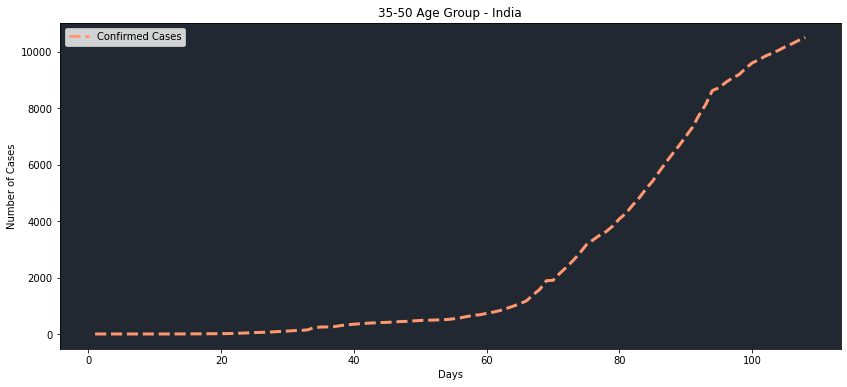

In [ ]:
num_plot = final.groupby('Date Announced')["Infected Increase"].sum()
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#222831')
cols = np.linspace(1, 108, 108)
ax.plot(cols,num_plot, color='#ff9770', linestyle='dashed',lw=3)
plt.title('35-50 Age Group - India')
plt.xlabel('Days'); plt.ylabel('Number of Cases');
plt.legend(['Confirmed Cases'])
plt.show()

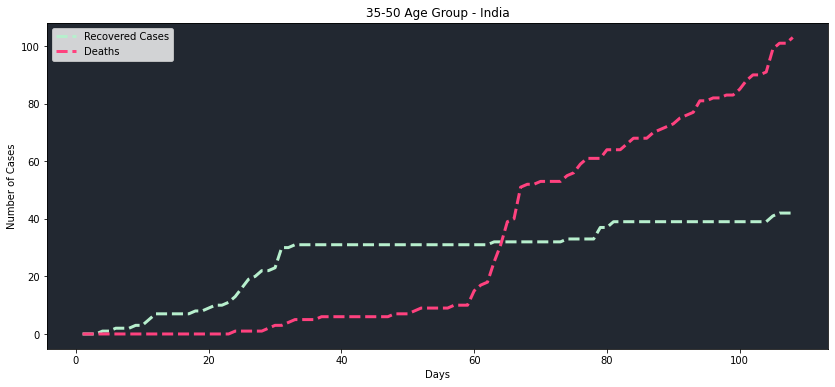

In [ ]:
num_plot = final.groupby('Date Announced')["Recovered Increase", "Death Increase"].sum()
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#222831')
cols = np.linspace(1, 108, 108)
ax.plot(cols,num_plot["Recovered Increase"], color='#b7efcd', linestyle='dashed',lw=3)
ax.plot(cols,num_plot["Death Increase"], color='#ff427f', linestyle='dashed',lw=3)
plt.title('35-50 Age Group - India')
plt.xlabel('Days'); plt.ylabel('Number of Cases');
plt.legend(['Recovered Cases','Deaths'])
plt.show()

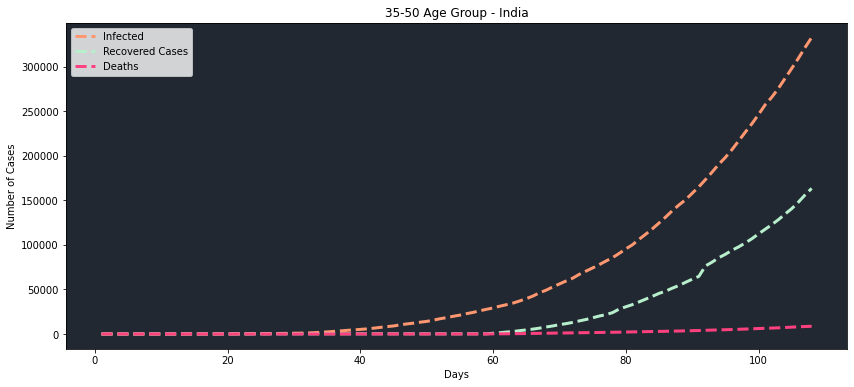

In [ ]:
num_plot = final.groupby('Date Announced')["Total Infected","Total Recovered", "Total Deaths"].sum()
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#222831')
cols = np.linspace(1, 108, 108)
ax.plot(cols,num_plot["Total Infected"], color='#ff9770', linestyle='dashed',lw=3)
ax.plot(cols,num_plot["Total Recovered"], color='#b7efcd', linestyle='dashed',lw=3)
ax.plot(cols,num_plot["Total Deaths"], color='#ff427f', linestyle='dashed',lw=3)
plt.title('35-50 Age Group - India')
plt.xlabel('Days'); plt.ylabel('Number of Cases');
plt.legend(['Infected','Recovered Cases','Deaths'])
plt.show()

In [ ]:
infection_rate=[]
for i in range(0,final.shape[0]):
  infection_rate.append((final['Infected Increase'][i]/final['Total Infected'][i])*100)

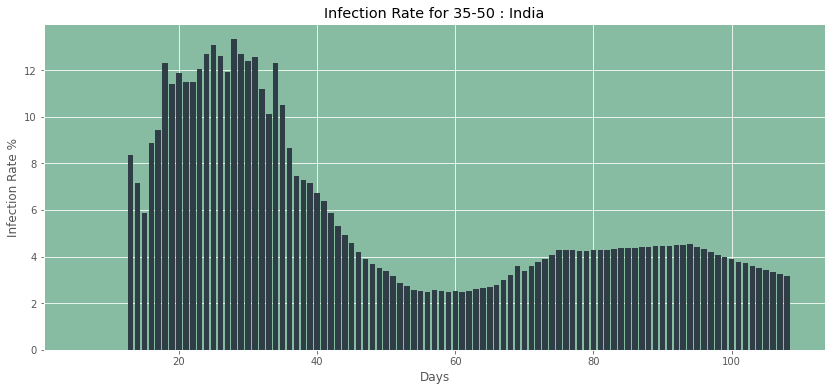

In [ ]:
#calculating the infection rate
infection_rate=[]
for i in range(0,final.shape[0]):
  infection_rate.append((
  final['Infected Increase'][i]/final['Total Infected'][i])*100)
#plotting the infection rate
matplotlib.style.use('ggplot')
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#87bba2')
cols = np.linspace(1, 108, 108)
ax.bar(cols,infection_rate,color='#2f3e46')
ax.set_title('Infection Rate for 35-50 : India')
ax.set_xlabel('Days')
ax.set_ylabel('Infection Rate %')
plt.show()

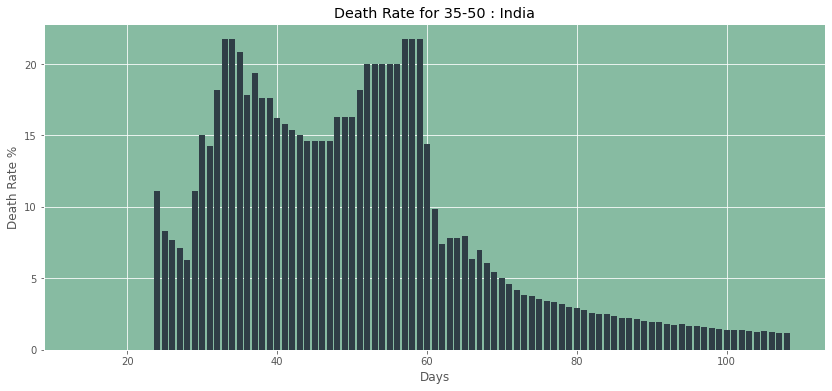

In [ ]:
#calculating the death rate
death_rate=[]
for i in range(0,final.shape[0]):
  death_rate.append((
  final['Death Increase'][i]/final['Total Deaths'][i])*100)
#plotting the death rate
matplotlib.style.use('ggplot')
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#87bba2')
cols = np.linspace(1, 108, 108)
ax.bar(cols,death_rate,color='#2f3e46')
ax.set_title('Death Rate for 35-50 : India')
ax.set_xlabel('Days')
ax.set_ylabel('Death Rate %')
plt.show()

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np 
import pandas as pd
import os
from numpy import log
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from datetime import date

In [ ]:
import pmdarima as pm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline 
import matplotlib
import seaborn as sns

In [ ]:
def plot_prediction(arima_df,train):
  plt.figure(figsize=(10, 5))
  plt.title('Per Day Prediction With 95% Confidence Interval')
  plt.plot(arima_df['Date'], arima_df['Predicted'],'r')
  plt.fill_between(arima_df['Date'],arima_df['Interval_lower'], arima_df['Interval_upper'])
  plt.plot(train['ds'], train['y'])
  plt.show()

In [ ]:
def arima_forecast(forecast,prediction_dates):
  pred=pd.DataFrame(forecast[0],columns=['Predicted'])
  std_err=pd.DataFrame(forecast[1],columns=['Std Error'])
  pred_upper=pd.DataFrame(forecast[2][:,1],columns=['Interval_upper'])
  pred_lower=pd.DataFrame(forecast[2][:,0],columns=['Interval_lower'])
  dates=pd.DataFrame(prediction_dates,columns=['Date'])
  arima1=pd.merge(dates,pred,right_index=True,left_index=True)
  arima2=pd.merge(pred_lower,pred_upper,right_index=True,left_index=True)
  arima3=pd.merge(arima1,std_err,right_index=True,left_index=True)
  arima_df=pd.merge(arima3,arima2,right_index=True,left_index=True)
  print(arima_df.tail(30))
  return arima_df

In [ ]:
def build_arima(train,order_dim,step_size):
  arima = ARIMA(endog=train['y'],order=order_dim) # endogenous variable as y
  #We shall use the Maximum liklihood function for maximixation rather than the default
  #We shall use the solver as conjugate gradient due to its faster converging rate
  arima = arima.fit(trend='nc', full_output=True, disp=True,transparams=True,solver='cg',maxiter=1000,method='mle')
  #for forecasting the future cases
  forecast = arima.forecast(steps=step_size)
  pred = list(forecast[0])
  start_date = train['ds'].max()
  prediction_dates = []
  for i in range(step_size):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
  return arima,forecast,prediction_dates


In [ ]:
def plot_lags(train):
  f = plt.figure(figsize=(25,15))
  ax1 = f.add_subplot(321,title='LAG 1')
  lag_plot(train['y'],lag=1)
  ax2 = f.add_subplot(322,title='LAG 2')
  lag_plot(train['y'],lag=2)
  ax3 = f.add_subplot(323,title='LAG 3')
  lag_plot(train['y'],lag=3)
  ax4 = f.add_subplot(324,title='LAG 4')
  lag_plot(train['y'],lag=4)
  ax5 = f.add_subplot(325,title='LAG 5')
  lag_plot(train['y'],lag=5)
  ax6 = f.add_subplot(326,title='LAG 6')
  lag_plot(train['y'],lag=6)

In [ ]:
def autocorr_diff(train):
  plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(train['y']); axes[0, 0].set_title('Original Series')
  plot_acf(train['y'], ax=axes[0, 1])
# 1st Differencing
  axes[1, 0].plot(train['y'].diff()); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(train['y'].diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
  axes[2, 0].plot(train['y'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(train['y'].diff().diff().dropna(), ax=axes[2, 1])
  plt.show()

In [ ]:
def pvalue_test(train):
  result_original = adfuller(train['y'].dropna())
  print('ADF Statistic for original: %f' % result_original[0])
  print('p-value for original: %f' % result_original[1])

  result_1st_order = adfuller(train['y'].diff().dropna())
  print('ADF Statistic for 1st Order Diff: %f' % result_1st_order[0])
  print('p-value for 1st Order Diff: %f' % result_1st_order[1])

  result_2nd_order = adfuller(train['y'].diff().diff().dropna())
  print('ADF Statistic for 2nd Order Diff: %f' % result_2nd_order[0])
  print('p-value for 2nd Order Diff: %f' % result_2nd_order[1])

In [ ]:
def acf_plot(train):
  fig, axes = plt.subplots(3, sharex=True,figsize=(15,7))
  plot_acf(train['y'], ax=axes[0],title='AutoCorrelation - Original')
  plot_acf(train['y'].diff().dropna(), ax=axes[1],title='AutoCorrelation - 1st Order')
  plot_acf(train['y'].diff().diff().dropna(), ax=axes[2],title='AutoCorrelation - 2nd Order')

In [ ]:
def pacf_plot(train):
  fig, axes = plt.subplots(3, 1, sharex=True,figsize=(15,7))
  plot_pacf(train['y'], lags=20,ax=axes[0],title='Original')
  plot_pacf(train['y'].diff().dropna(), lags=20,ax=axes[1],title='1st order')
  plot_pacf(train['y'].diff().diff().dropna(), lags=20,ax=axes[2],title='2nd order')

In [ ]:
def diff_plot(train):
  fig, axes = plt.subplots(3, 1, sharex=True,figsize=(15,7))
  axes[0].plot(train['y']); axes[0].set_title('Original')
  axes[1].plot(train['y'].diff()); axes[1].set_title('1st Differencing')
  axes[2].plot(train['y'].diff().diff()); axes[2].set_title('2nd Differencing')

In [ ]:
def autocorr_plot(train):
  fig, axes = plt.subplots(3, 1, sharex=True,figsize=(20,10))
  autocorrelation_plot(train['y'],ax=axes[0]); axes[0].set_title('Original')
  autocorrelation_plot(train['y'].diff().dropna());axes[1].set_title('1st Differencing')
  autocorrelation_plot(train['y'].diff().diff().dropna());axes[2].set_title('2nd Differencing')

In [ ]:
def autocorr_plot(train):
  autocorrelation_plot(train['y']);

In [ ]:
def show_residuals(arima):
  print(arima.summary())
#plot residual errors
  residuals = DataFrame(arima.resid)
  residuals.plot(figsize= (10,5))
  plt.show()
  residuals.plot(kind='kde',figsize= (10,5))
  plt.show()
  autocorrelation_plot(residuals)
  plt.show()
  print(residuals.describe())

In [ ]:
def train_rename(train,test,name):
  train.rename(columns={"Date Announced":"ds",name:"y"},inplace=True)
  test.rename(columns={"Date Announced":"ds",name:"y"},inplace=True)
  test = test.set_index("ds")
  test = test['y']

In [ ]:
def gridSearch(train):
  model = pm.auto_arima(train['y'], start_p=1, start_q=1,
          test='adf',       # using adftest to find optimal 'p' and 'q'
          max_p=4, max_q=5, # maximum p and q
          m=1,              # frequency of series
          d=2,           
          seasonal=False,   # No Seasonality
          start_P=0, 
          D=0, 
          trace=True,
          error_action='ignore',  
          suppress_warnings=True, 
          stepwise=False)
  print(model.summary())

In [ ]:
final

,Date Announced,Infected,Recovered,Death,Total Infected,Total Recovered,Total Deaths,Infected Increase,Death Increase,Recovered Increase
0,2020-01-30,0,0,0,0,1.0,0,0,0,0
1,2020-02-02,0,0,0,0,2.0,0,0,0,0
2,2020-02-03,0,0,0,0,3.0,0,0,0,0
3,2020-03-02,0,1,0,0,5.0,0,0,0,1
4,2020-03-03,0,0,0,0,6.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
103,2020-06-10,105,0,1,286926,134623.0,7272,10052,91,39
104,2020-06-11,126,2,8,298061,140667.0,7666,10178,99,41
105,2020-06-12,104,1,2,309367,147930.0,8054,10282,101,42
106,2020-06-13,119,0,0,321406,156022.0,8363,10401,101,42


In [ ]:
#number days to use for testing:
days=1;
# number of future outcomes for prediction
future=50;

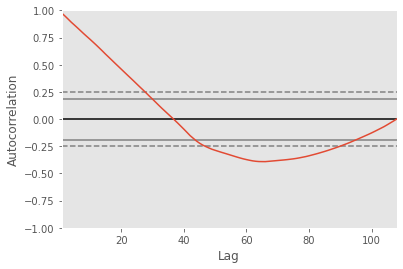

In [ ]:
autocorr_plot(train_dead)

In [ ]:
plot_lags(train_dead)

NameError: ignored

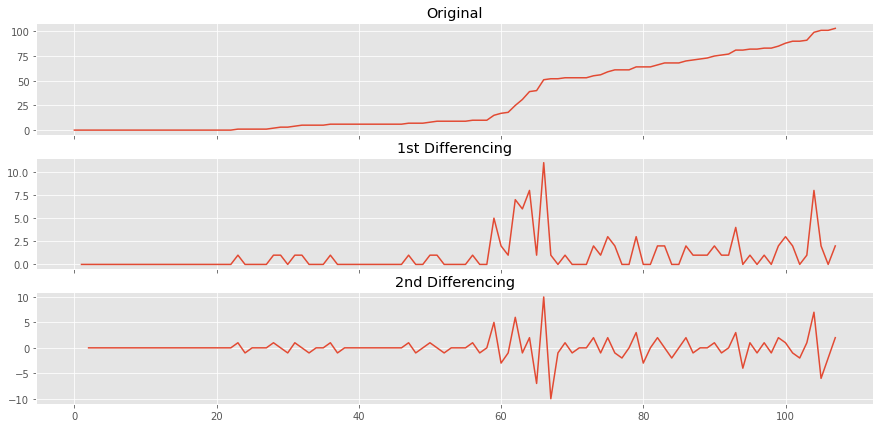

In [ ]:
diff_plot(train_dead)

In [ ]:
pvalue_test(train_dead)

ADF Statistic for original: 0.974041
p-value for original: 0.993984
ADF Statistic for 1st Order Diff: -2.940335
p-value for 1st Order Diff: 0.040855
ADF Statistic for 2nd Order Diff: -5.348178
p-value for 2nd Order Diff: 0.000004


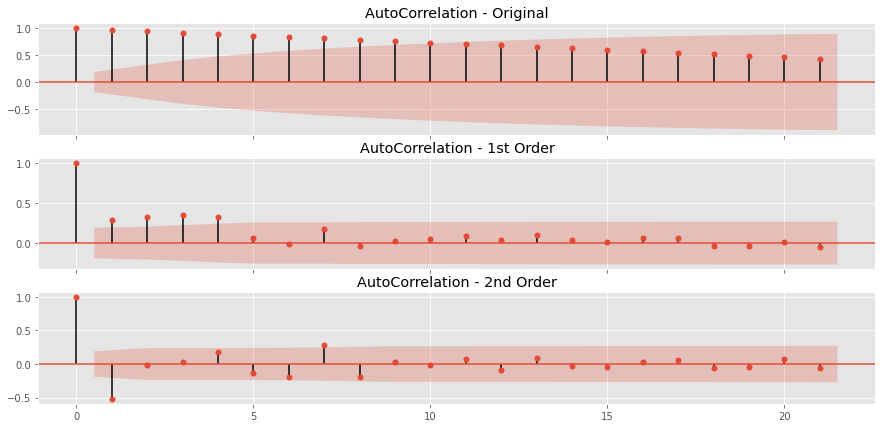

In [ ]:
acf_plot(train_dead)

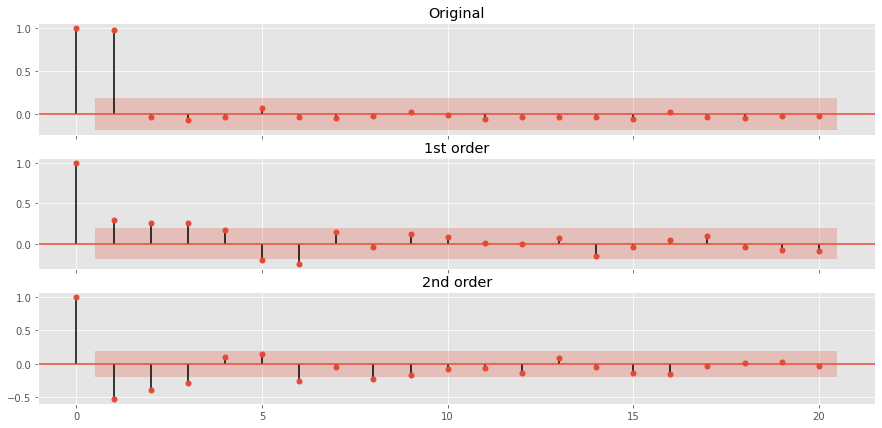

In [ ]:
pacf_plot(train_dead)

In [ ]:
gridSearch(train_conf)

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=1188.790, BIC=1194.117, Time=0.015 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=1158.275, BIC=1166.265, Time=0.082 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=1159.346, BIC=1170.000, Time=0.133 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=1155.475, BIC=1168.792, Time=0.184 seconds
Fit ARIMA(0,2,4)x(0,0,0,0) [intercept=True]; AIC=1157.447, BIC=1173.428, Time=0.207 seconds
Fit ARIMA(0,2,5)x(0,0,0,0) [intercept=True]; AIC=1158.528, BIC=1177.172, Time=0.337 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=1155.852, BIC=1163.842, Time=0.044 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=1157.600, BIC=1168.254, Time=0.077 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=1158.485, BIC=1171.802, Time=0.141 seconds
Fit ARIMA(1,2,3)x(0,0,0,0) [intercept=True]; AIC=1157.463, BIC=1173.444, Time=0.224 seconds
Fit ARIMA(1,2,4)x(0,0,0,0) [intercept=True]; AIC=1157.854, BIC=1176.498, Time=0.

In [ ]:
final

,Date Announced,Infected,Recovered,Death,Total Infected,Total Recovered,Total Deaths,Infected Increase,Death Increase,Recovered Increase
0,2020-01-30,0,0,0,0,1.0,0,0,0,0
1,2020-02-02,0,0,0,0,2.0,0,0,0,0
2,2020-02-03,0,0,0,0,3.0,0,0,0,0
3,2020-03-02,0,1,0,0,5.0,0,0,0,1
4,2020-03-03,0,0,0,0,6.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
103,2020-06-10,105,0,1,286926,134623.0,7272,10052,91,39
104,2020-06-11,126,2,8,298061,140667.0,7666,10178,99,41
105,2020-06-12,104,1,2,309367,147930.0,8054,10282,101,42
106,2020-06-13,119,0,0,321406,156022.0,8363,10401,101,42


In [ ]:
train_conf = final.iloc[:,[0,4]]
test_conf = final.iloc[:,[0,4]]
train_rename(train_conf,test_conf,"Total Infected")

Optimization terminated successfully.
         Current function value: 7.501302
         Iterations: 18
         Function evaluations: 48
         Gradient evaluations: 48
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  106
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -795.138
Method:                           mle   S.D. of innovations            434.468
Date:                Mon, 15 Jun 2020   AIC                           1600.276
Time:                        09:40:52   BIC                           1613.593
Sample:                             2   HQIC                          1605.673
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y     0.4695      0.092      

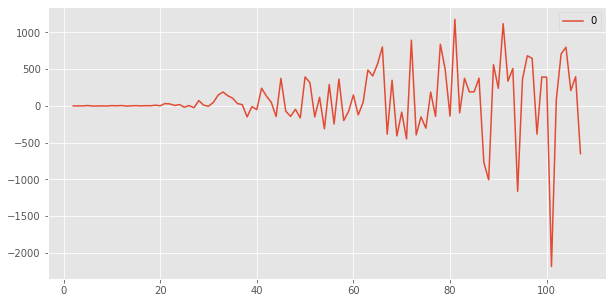

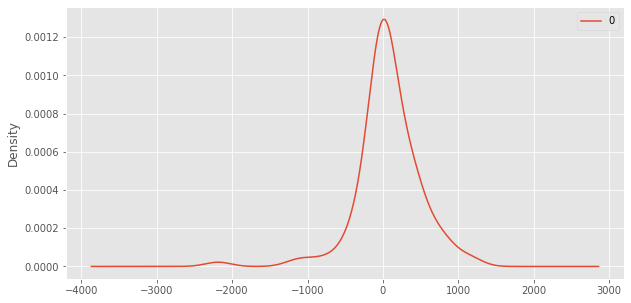

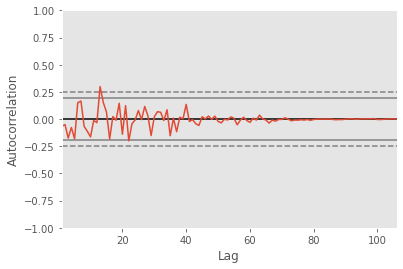

                 0
count   106.000000
mean     70.482455
std     430.753905
min   -2185.502000
25%     -66.926659
50%       7.402067
75%     309.786978
max    1177.749312
          Date     Predicted     Std Error  Interval_lower  Interval_upper
150 2020-11-12  3.950827e+06  9.806055e+05    2.028875e+06    5.872778e+06
151 2020-11-13  3.984169e+06  9.942626e+05    2.035450e+06    5.932888e+06
152 2020-11-14  4.017603e+06  1.008019e+06    2.041923e+06    5.993283e+06
153 2020-11-15  4.051129e+06  1.021873e+06    2.048295e+06    6.053964e+06
154 2020-11-16  4.084747e+06  1.035827e+06    2.054564e+06    6.114931e+06
155 2020-11-17  4.118456e+06  1.049879e+06    2.060730e+06    6.176182e+06
156 2020-11-18  4.152256e+06  1.064031e+06    2.066794e+06    6.237718e+06
157 2020-11-19  4.186146e+06  1.078281e+06    2.072754e+06    6.299538e+06
158 2020-11-20  4.220125e+06  1.092630e+06    2.078609e+06    6.361640e+06
159 2020-11-21  4.254193e+06  1.107078e+06    2.084360e+06    6.424026e+06
160 

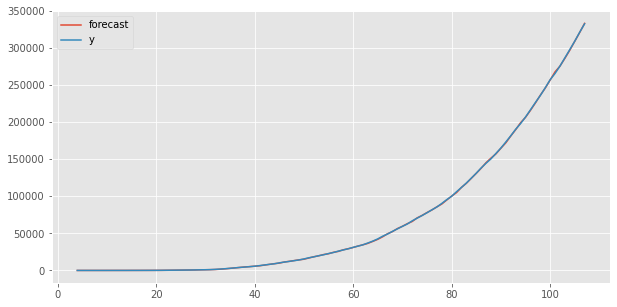

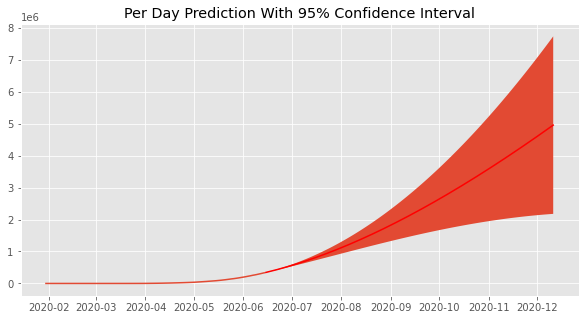

In [ ]:
#building, training and forecasting
arima,forecast,prediction_dates=build_arima(train_conf,(3,2,1),180)
#plotting the residuals
show_residuals(arima)
arima_df=arima_forecast(forecast,prediction_dates)
fig, ax = plt.subplots(figsize=(10,5))
#plotting the model fit
arima.plot_predict(ax=ax)
#plotting the firecast
conf_cases=plot_prediction(arima_df,train_conf)

In [ ]:
hello=arima.predict(typ='levels')
hello

4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
           ...     
103    10078.463895
104    10163.472561
105    10300.054320
106    10399.897925
107    10512.886776
Length: 104, dtype: float64

all death done

In [ ]:
current=pd.DataFrame(hello)
future=arima_df['Predicted']
frames=[current,future];
df_death=pd.concat(frames);
df_death=df_death.reset_index()
df_death=df_death.drop(columns='index')

all recovery

In [ ]:
current=pd.DataFrame(hello)
future=arima_df['Predicted']
frames=[current,future];
df_recv=pd.concat(frames);
df_recv=df_recv.reset_index()
df_recv=df_recv.drop(columns='index')

all infections

In [ ]:
current=pd.DataFrame(hello)
future=arima_df['Predicted']
frames=[current,future];
df_infect=pd.concat(frames);
df_infect=df_infect.reset_index()
df_infect=df_infect.drop(columns='index')

In [ ]:
df_infect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       154 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


age death

In [ ]:
current=pd.DataFrame(hello)
future=arima_df['Predicted']
frames=[current,future];
df_age_death=pd.concat(frames);
df_age_death=df_age_death.reset_index()
df_age_death=df_age_death.drop(columns='index')

age infections

In [ ]:
current=pd.DataFrame(hello)
future=arima_df['Predicted']
frames=[current,future];
df_age_infect=pd.concat(frames);
df_age_infect=df_age_infect.reset_index()
df_age_infect=df_age_infect.drop(columns='index')

In [ ]:
print(infection_rate)

[3.2463671736789506, 3.432046158844624, 3.317951839736197, 3.2703098566981836, 3.2323570463427806, 3.1683369886011086, 3.1169171205522828, 3.0713534547140764, 3.0208896812866364, 2.9733544700085948, 2.9285935761517807, 2.883734522351201, 2.8402088162603425, 2.798253836268023, 2.757143570201092, 2.7170839937943048, 2.6781623066053837, 2.640187439022369, 2.6031570013570584, 2.567077420400068, 2.531883969038569, 2.4975476751161785, 2.464050016049077, 2.431356345384635, 2.3994387049270443, 2.368273854062108, 2.3378357534955936, 2.308100045117423, 2.2790444444090907, 2.250646793838811, 2.222885831287667, 2.195741437172485, 2.1691941466869102, 2.1432252358359625, 2.1178167892569593, 2.0929515677988015, 2.0686129888683142, 2.04478512635487, 2.021452661512324, 1.9986008545446947, 1.9762155264589254, 1.9542830304575451, 1.9327902272839501, 1.9117244647113032, 1.891073555589018, 1.8708257571381486, 1.8509697520889348]


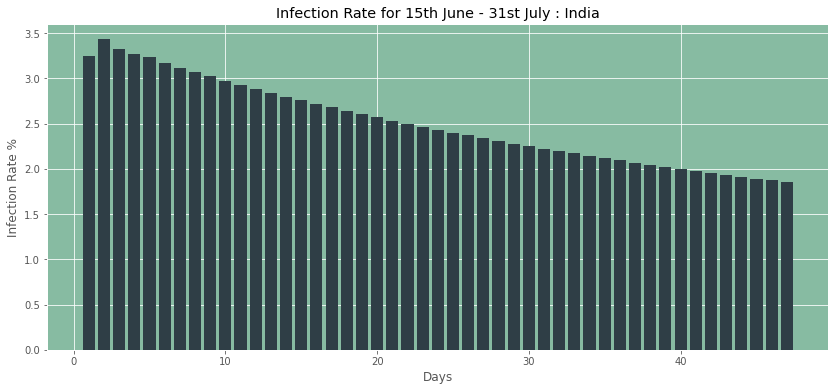

In [ ]:
#calculating the infection rate
infection_rate=[]
for i in range(104,151):
  infection_rate.append((
  (df_infect[0][i]-df_infect[0][i-1])/df_infect[0][i])*100)
#plotting the infection rate
matplotlib.style.use('ggplot')
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#87bba2')
cols = np.linspace(1, 47, 47)
ax.bar(cols,infection_rate,color='#2f3e46')
ax.set_title('Infection Rate for 15th June - 31st July : India')
ax.set_xlabel('Days')
ax.set_ylabel('Infection Rate %')
plt.show()

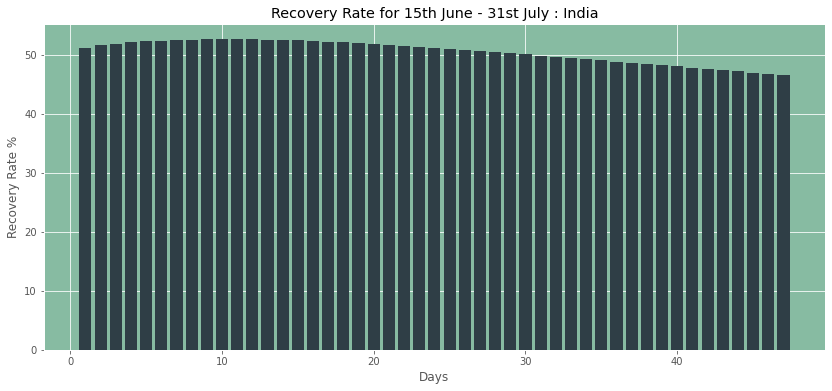

In [ ]:
#calculating the recovery rate
recovery_rate=[]
for i in range(104,151):
  recovery_rate.append((
  (df_recv[0][i])/df_infect[0][i-1])*100)
#plotting the recovery rate
matplotlib.style.use('ggplot')
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#87bba2')
cols = np.linspace(1, 47, 47)
ax.bar(cols,recovery_rate,color='#2f3e46')
ax.set_title('Recovery Rate for 15th June - 31st July : India')
ax.set_xlabel('Days')
ax.set_ylabel('Recovery Rate %')
plt.show()

In [ ]:
mean=sum(recovery_rate)/len(recovery50.47%_rate)
print(str(mean)+'%')

50.466932129171525%


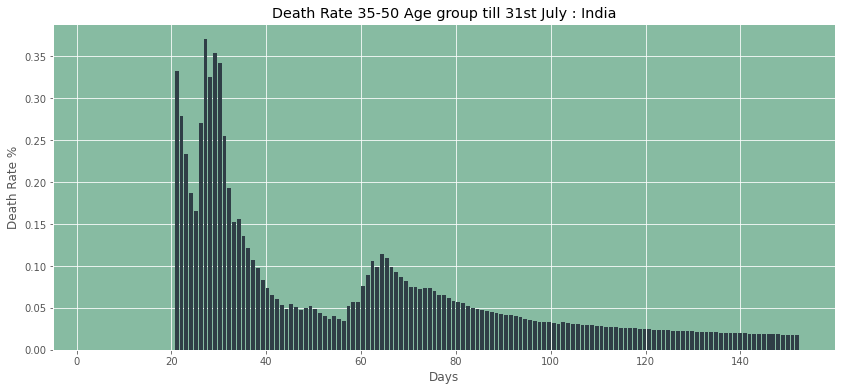

In [ ]:
#calculating the age death rate
age_death_rate=[]
for i in range(0,151):
  age_death_rate.append((
  (df_age_death[0][i])/df_infect[0][i])*100)
#plotting the death rate
matplotlib.style.use('ggplot')
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#87bba2')
cols = np.linspace(1, 152, 151)
ax.bar(cols,age_death_rate,color='#2f3e46')
ax.set_title('Death Rate 35-50 Age group till 31st July : India')
ax.set_xlabel('Days')
ax.set_ylabel('Death Rate %')
plt.show()

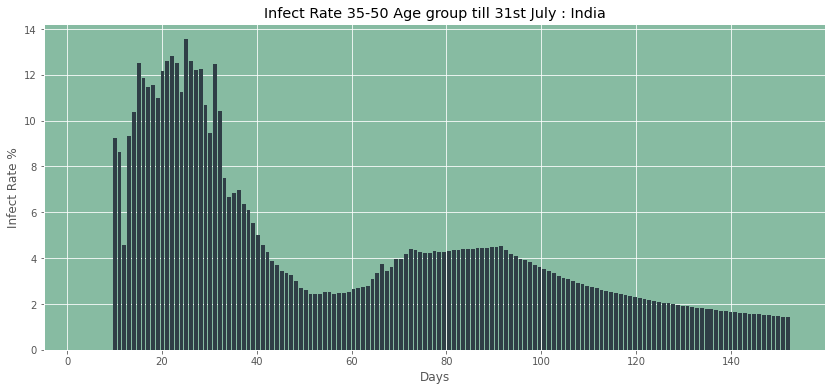

In [ ]:
#calculating the age infect rate
age_infect_rate=[]
for i in range(0,151):
  age_infect_rate.append((
  (df_age_infect[0][i])/df_infect[0][i])*100)
#plotting the infection rate
matplotlib.style.use('ggplot')
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#87bba2')
cols = np.linspace(1, 152, 151)
ax.bar(cols,age_infect_rate,color='#2f3e46')
ax.set_title('Infect Rate 35-50 Age group till 31st July : India')
ax.set_xlabel('Days')
ax.set_ylabel('Infect Rate %')
plt.show()

In [ ]:
max(age_death_rate)


nan

In [ ]:
import csv
with open('/gdrive/My Drive/ml/all_death_current.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(hello)

In [ ]:
import csv
with open('/gdrive/My Drive/ml/all_death_future.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(arima_df['Predicted'])